### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
import matplotlib as plt

#1. Análisis de facturación (Ingreso total por cada tienda)



In [ ]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [ ]:
pd.DataFrame.describe(tienda)

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
count,2.359000e+03,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,4.878679e+05,26018.609580,3.976685,2.943196,5.365283,-74.789417
std,6.146868e+05,32860.001783,1.415370,2.819897,2.287445,1.217827
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110
25%,5.575000e+04,3100.000000,3.000000,1.000000,4.609710,-75.563590
50%,2.353000e+05,12400.000000,5.000000,1.000000,4.609710,-74.199040
75%,6.781000e+05,36000.000000,5.000000,4.000000,6.251840,-74.081750
max,2.977000e+06,160800.000000,5.000000,24.000000,11.544440,-67.923900


In [ ]:
precio_total1 = sum(tienda['Precio'])
precio_total1

1150880400.0

In [ ]:
precio_total2 = sum(tienda2['Precio'])
precio_total2

1116343500.0

In [ ]:
precio_total3 = sum(tienda3['Precio'])
precio_total3

1098019600.0

In [ ]:
precio_total4 = sum(tienda4['Precio'])
precio_total4

1038375700.0

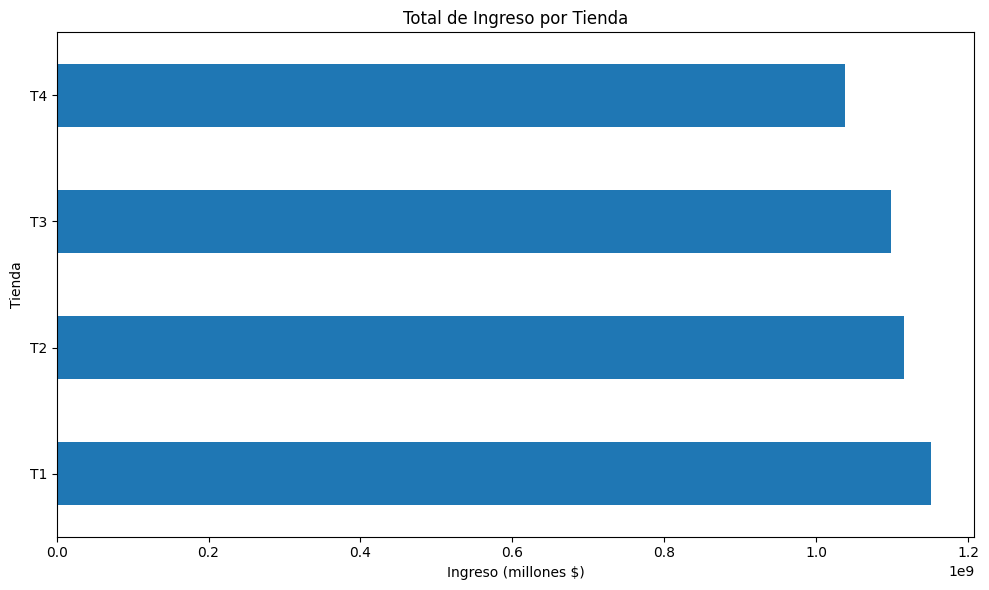

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

ingreso = pd.Series({
    'T1': precio_total1,
    'T2': precio_total2,
    'T3': precio_total3,
    'T4': precio_total4
})

# Gráfica de barras horizontal - Total de Ingreso por Tienda
plt.figure(figsize=(10, 6))
ingreso.plot(kind='barh')
plt.title('Total de Ingreso por Tienda')
plt.xlabel('Ingreso (millones $)')
plt.ylabel('Tienda')
plt.xticks(rotation=0) # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

# 2. Ventas por categoría



In [ ]:
# cantidad de productos vendidos por categoría en cada tienda. check
# agrupar los datos por categoría.
# contar el número de ventas de cada tipo.
# mostrar las categorías más populares de cada tienda.



In [ ]:
type(tienda['Categoría del Producto'])

pandas.core.series.Series

In [ ]:
serie_1 = tienda['Categoría del Producto']
serie_1

,Categoría del Producto
0,Electrónicos
1,Muebles
2,Juguetes
3,Electrodomésticos
4,Muebles
...,...
2354,Electrónicos
2355,Electrónicos
2356,Juguetes
2357,Muebles


In [ ]:
serie_t1 = serie_1.value_counts()
print(f'La categoría más vendida es: {serie_t1.idxmax()} \nLa categoría menos vendida fue: {serie_t1.idxmin()}')
serie_t1

La categoría más vendida es: Muebles 
La categoría menos vendida fue: Artículos para el hogar


,count
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


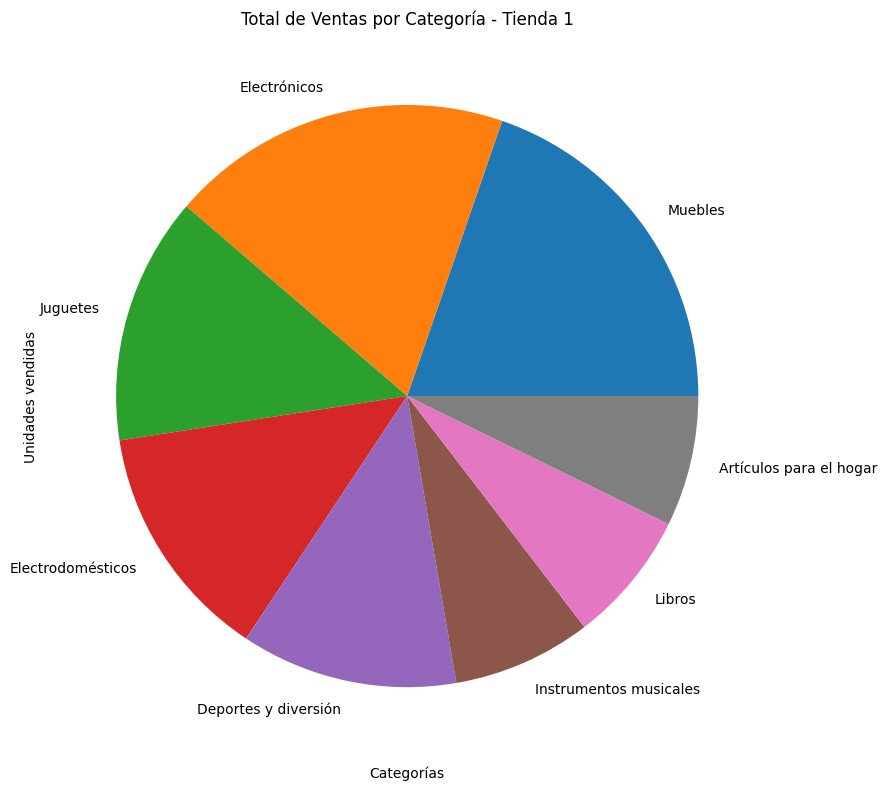

In [ ]:
import matplotlib.pyplot as plt

# Gráfica de pastel - Tienda 1
plt.figure(figsize=(9, 9))
serie_t1.plot(kind='pie')
plt.title('Total de Ventas por Categoría - Tienda 1')
plt.xlabel('Categorías')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
serie_t2 = tienda2.value_counts('Categoría del Producto')
print(f'La categoría más vendida es: {serie_t2.idxmax()} \nLa categoría menos vendida fue: {serie_t2.idxmin()}')
serie_t2

La categoría más vendida es: Muebles 
La categoría menos vendida fue: Artículos para el hogar


,count
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


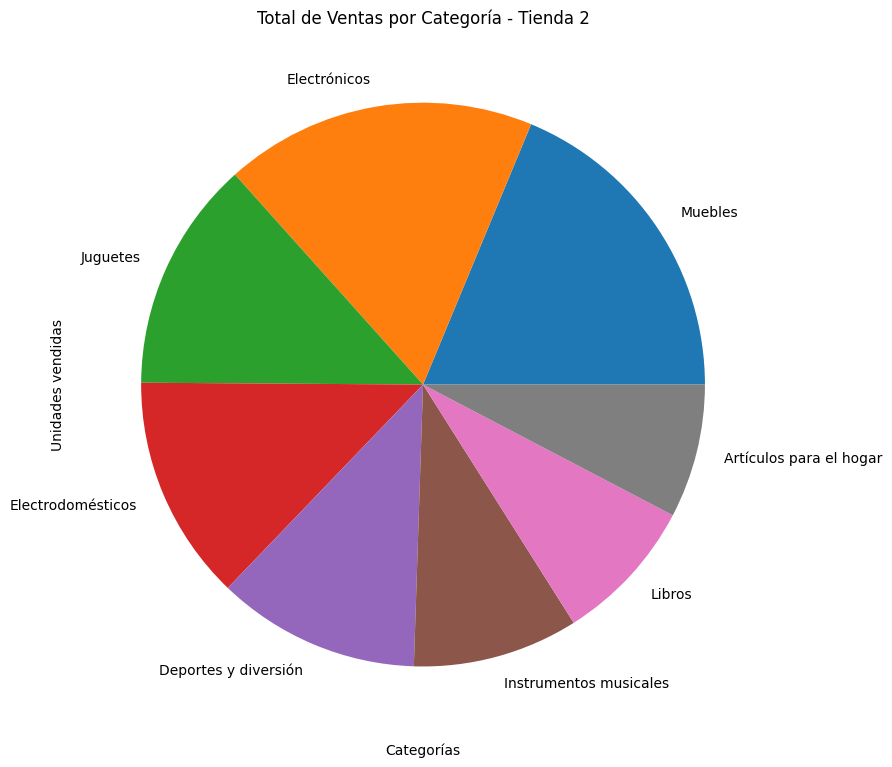

In [ ]:
# Gráfica de pastel - Tienda 2
plt.figure(figsize=(9, 9))
serie_t2.plot(kind='pie')
plt.title('Total de Ventas por Categoría - Tienda 2')
plt.xlabel('Categorías')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
serie_t3 = tienda3.value_counts('Categoría del Producto')
print(f'La categoría más vendida es: {serie_t3.idxmax()} \nLa categoría menos vendida fue: {serie_t3.idxmin()}')
serie_t3

La categoría más vendida es: Muebles 
La categoría menos vendida fue: Artículos para el hogar


,count
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Artículos para el hogar,177
Instrumentos musicales,177


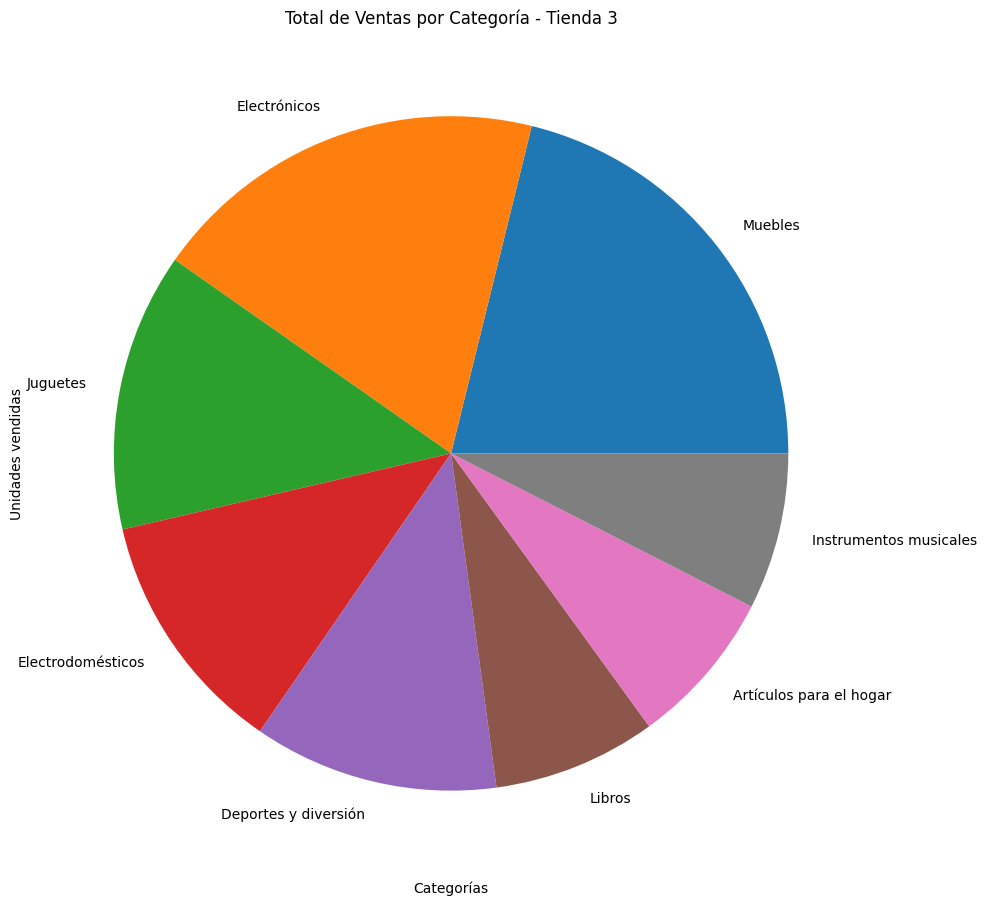

In [ ]:
# Gráfica de pastel - Tienda 3
plt.figure(figsize=(10, 10))
serie_t3.plot(kind='pie')
plt.title('Total de Ventas por Categoría - Tienda 3')
plt.xlabel('Categorías')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
serie_t4 = tienda4.value_counts('Categoría del Producto')
print(f'La categoría más vendida es: {serie_t4.idxmax()} \nLa categoría menos vendida fue: {serie_t4.idxmin()}')
serie_t4

La categoría más vendida es: Muebles 
La categoría menos vendida fue: Instrumentos musicales


,count
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


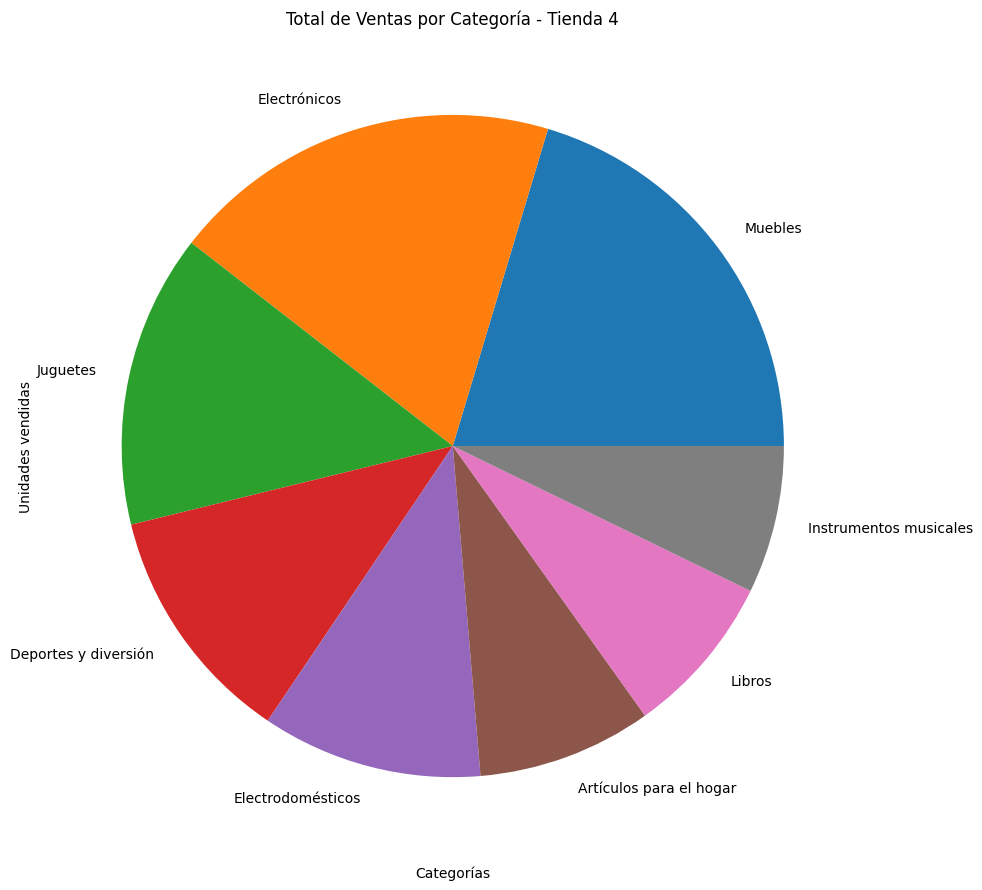

In [ ]:
# Gráfica de pastel - Tienda 4
plt.figure(figsize=(10, 10))
serie_t4.plot(kind='pie')
plt.title('Total de Ventas por Categoría - Tienda 4')
plt.xlabel('Categorías')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
val_med_t1 = sum(tienda['Calificación']/len(tienda['Calificación']))
print(f'La calificación promedio de la Tienda 1 es de: {round(val_med_t1,3)}')

La calificación promedio de la Tienda 1 es de: 3.977


In [ ]:
val_med_t2 = sum(tienda2['Calificación']/len(tienda2['Calificación']))
print(f'La calificación promedio de la Tienda 2 es de: {round(val_med_t2,3)}')

La calificación promedio de la Tienda 2 es de: 4.037


In [ ]:
val_med_t3 = sum(tienda3['Calificación']/len(tienda3['Calificación']))
print(f'La calificación promedio de la Tienda 3 es de: {round(val_med_t3,3)}')

La calificación promedio de la Tienda 3 es de: 4.048


In [ ]:
val_med_t4 = sum(tienda4['Calificación']/len(tienda4['Calificación']))
print(f'La calificación promedio de la Tienda 4 es de: {round(val_med_t4,3)}')

La calificación promedio de la Tienda 4 es de: 3.996


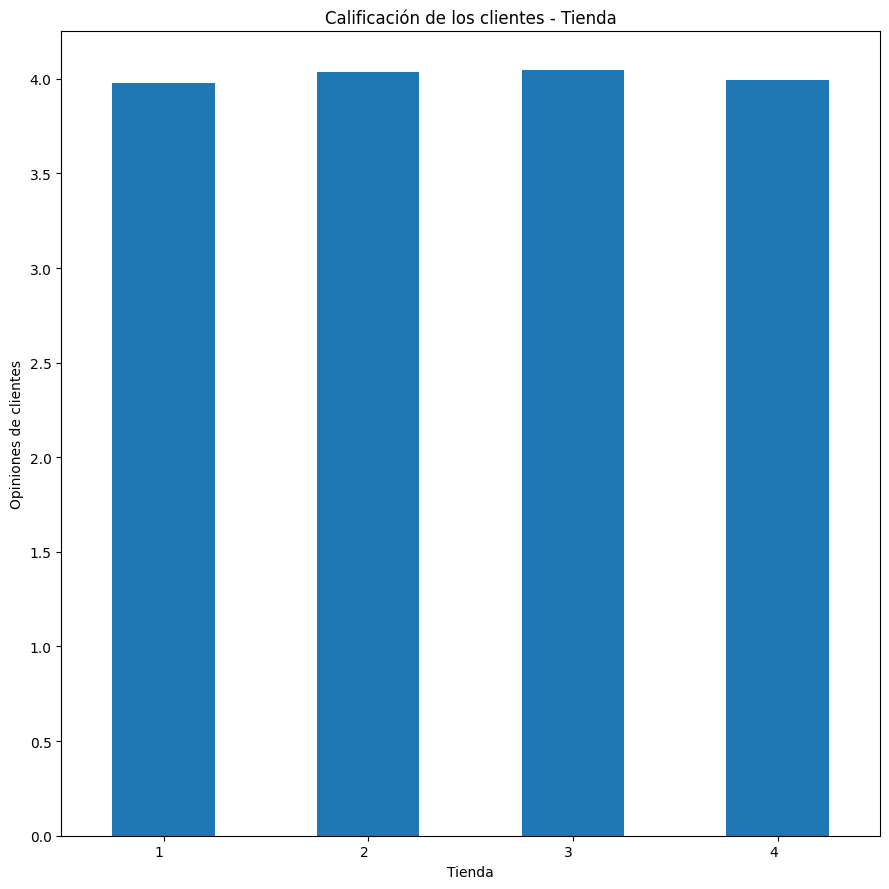

In [ ]:
# Gráfica de barras - Opiniones

opinion = pd.Series({
    '1': val_med_t1,
    '2': val_med_t2,
    '3': val_med_t3,
    '4': val_med_t4
})

plt.figure(figsize=(9, 9))
opinion.plot(kind='bar')
plt.title('Calificación de los clientes - Tienda')
plt.xlabel('Tienda')
plt.ylabel('Opiniones de clientes')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
serie_prod = tienda['Producto']
serie_prod

,Producto
0,Asistente virtual
1,Mesa de comedor
2,Juego de mesa
3,Microondas
4,Silla de oficina
...,...
2354,Iphone 15
2355,Impresora
2356,Juego de mesa
2357,Cama box


In [ ]:
serie_prod_t1 = serie_prod.value_counts()
print(f'El producto más vendido en la Tienda #1 fue: {serie_prod_t1.idxmax()} \nEl producto menos vendido en la Tienda #1 fue: {serie_prod_t1.idxmin()}')
serie_prod_t1

El producto más vendido en la Tienda #1 fue: Microondas 
El producto menos vendido en la Tienda #1 fue: Auriculares con micrófono


,count
Producto,
Microondas,60
TV LED UHD 4K,60
Armario,60
Secadora de ropa,58
Mesa de noche,56
Bloques de construcción,56
Balón de baloncesto,55
Bicicleta,54
Vaso térmico,54


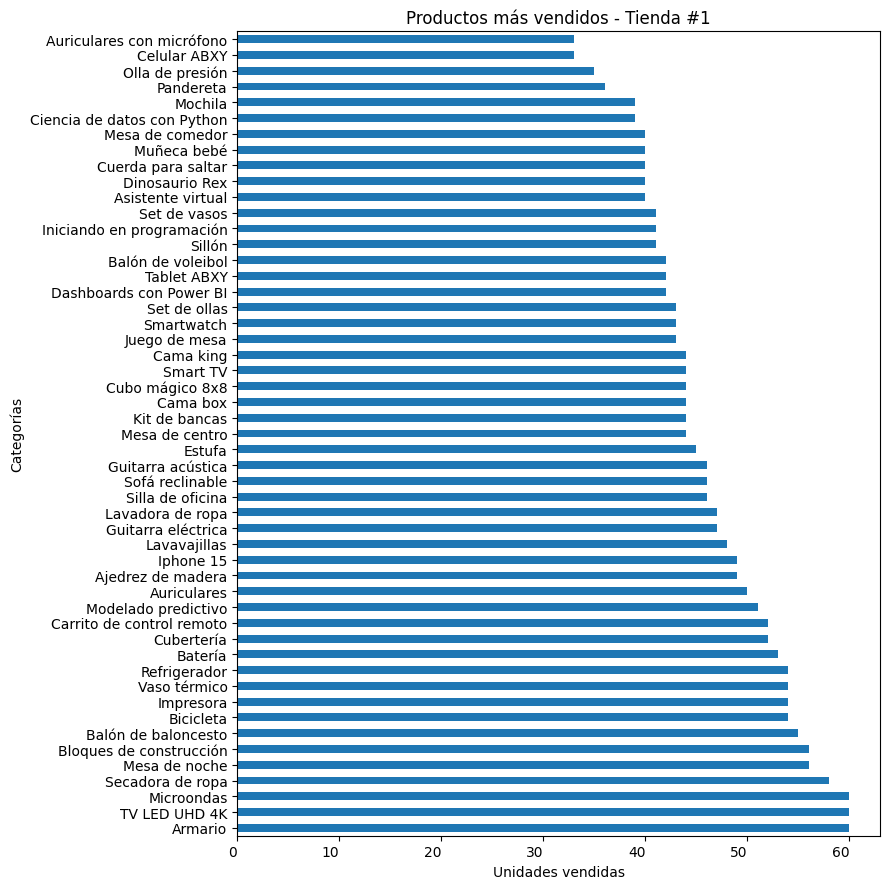

In [193]:
# Diagrama de caja - Productos más vendidos - Tienda #1

plt.figure(figsize=(9, 9))
serie_prod_t1.plot(kind='barh')
plt.title('Productos más vendidos - Tienda #1')
plt.xlabel('Unidades vendidas')
plt.ylabel('Categorías')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
serie_prod_t2 = tienda2.value_counts('Producto')
print(f'El producto más vendido en la Tienda #2 fue: {serie_prod_t2.idxmax()} \nEl producto menos vendido en la Tienda #2 fue: {serie_prod_t2.idxmin()}')
serie_prod_t2

El producto más vendido en la Tienda #2 fue: Iniciando en programación 
El producto menos vendido en la Tienda #2 fue: Juego de mesa


,count
Producto,
Iniciando en programación,65
Microondas,62
Batería,61
Pandereta,58
Guitarra acústica,58
Secadora de ropa,57
Iphone 15,55
Bloques de construcción,54
Armario,54


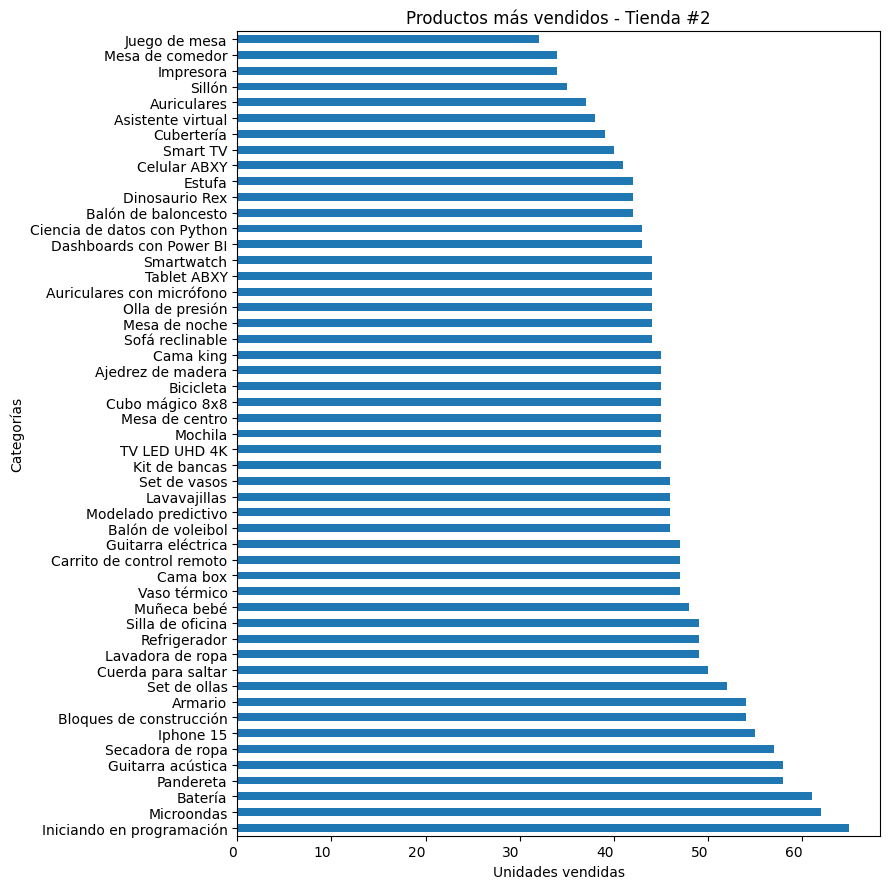

In [194]:
# Diagrama de caja - Productos más vendidos - Tienda #2

plt.figure(figsize=(9, 9))
serie_prod_t2.plot(kind='barh')
plt.title('Productos más vendidos - Tienda #2')
plt.xlabel('Unidades vendidas')
plt.ylabel('Categorías')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
serie_prod_t3 = tienda3.value_counts('Producto')
print(f'El producto más vendido en la Tienda #3 fue: {serie_prod_t3.idxmax()} \nEl producto menos vendido en la Tienda #3 fue: {serie_prod_t3.idxmin()}')
serie_prod_t3

El producto más vendido en la Tienda #3 fue: Kit de bancas 
El producto menos vendido en la Tienda #3 fue: Bloques de construcción


,count
Producto,
Kit de bancas,57
Mesa de comedor,56
Cama king,56
Set de ollas,55
Mesa de noche,55
Smart TV,54
Modelado predictivo,53
Cuerda para saltar,53
Estufa,53


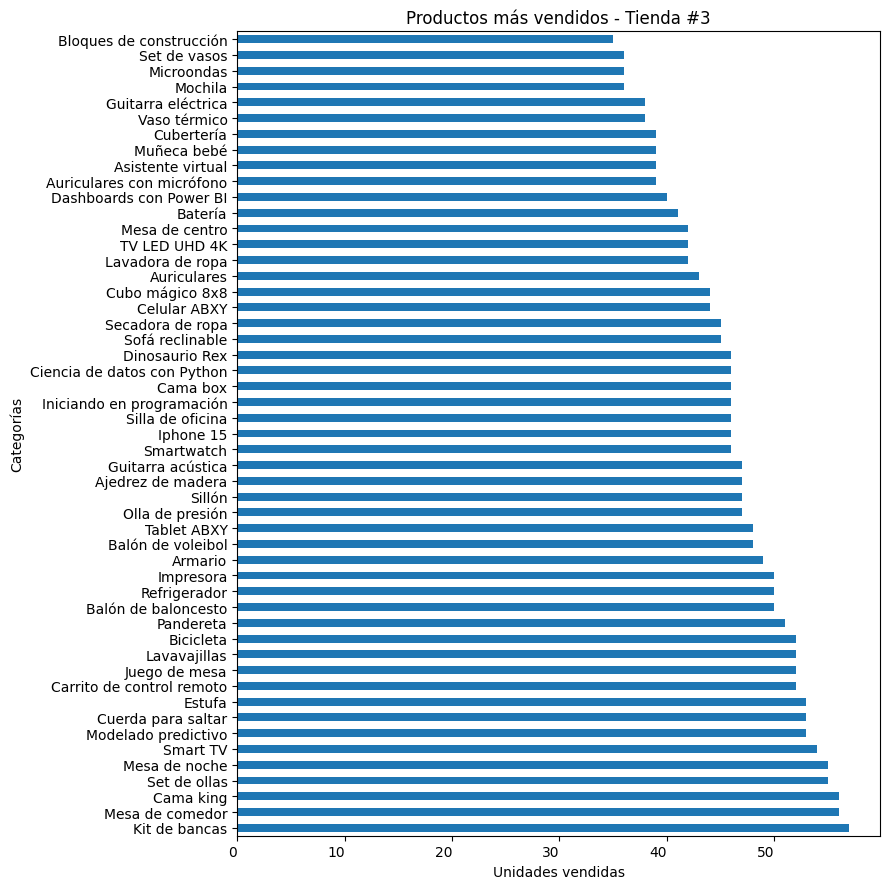

In [195]:
# Diagrama de caja - Productos más vendidos - Tienda #3

plt.figure(figsize=(9, 9))
serie_prod_t3.plot(kind='barh')
plt.title('Productos más vendidos - Tienda #3')
plt.xlabel('Unidades vendidas')
plt.ylabel('Categorías')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
serie_prod_t4 = tienda4.value_counts('Producto')
print(f'El producto más vendido en la Tienda #4 fue: {serie_prod_t4.idxmax()} \nEl producto menos vendido en la Tienda #4 fue: {serie_prod_t4.idxmin()}')
serie_prod_t4

El producto más vendido en la Tienda #4 fue: Cama box 
El producto menos vendido en la Tienda #4 fue: Guitarra eléctrica


,count
Producto,
Cama box,62
Cubertería,59
Cama king,56
Dashboards con Power BI,56
Carrito de control remoto,55
Mesa de noche,55
Mesa de comedor,55
Bloques de construcción,54
Smart TV,54


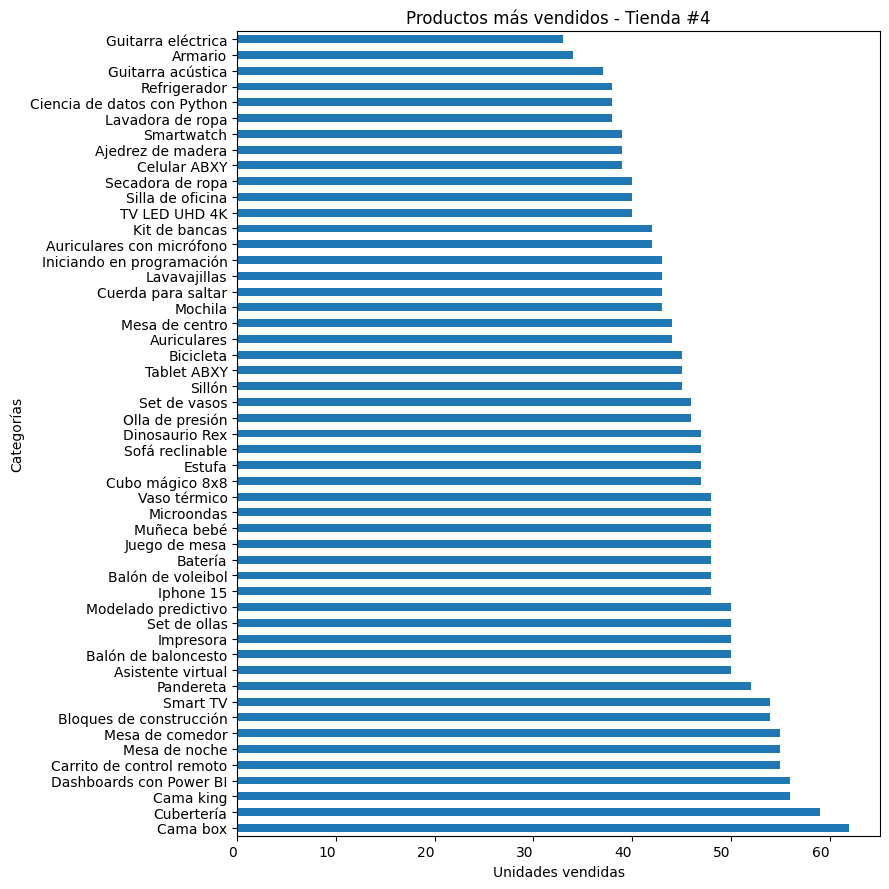

In [196]:
# Diagrama de caja - Productos más vendidos - Tienda #4

plt.figure(figsize=(9, 9))
serie_prod_t4.plot(kind='barh')
plt.title('Productos más vendidos - Tienda #4')
plt.xlabel('Unidades vendidas')
plt.ylabel('Categorías')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

# 5. Costo envío promedio por tienda

In [ ]:
costo_envio_prom_t1 = sum(tienda['Costo de envío'])/len(tienda['Costo de envío'])
print(f'El costo promedio del envío en la Tienda #1 es: $ {round(costo_envio_prom_t1,2)} pesos colombianos')

El costo promedio del envío en la Tienda #1 es: $ 26018.61 pesos colombianos


In [ ]:
costo_envio_prom_t2 = sum(tienda2['Costo de envío'])/len(tienda2['Costo de envío'])
print(f'El costo promedio del envío en la Tienda #2 es: $ {round(costo_envio_prom_t2,2)} pesos colombianos')

El costo promedio del envío en la Tienda #2 es: $ 25216.24 pesos colombianos


In [ ]:
costo_envio_prom_t3 = sum(tienda3['Costo de envío'])/len(tienda3['Costo de envío'])
print(f'El costo promedio del envío en la Tienda #3 es: $ {round(costo_envio_prom_t3,2)} pesos colombianos')

El costo promedio del envío en la Tienda #3 es: $ 24805.68 pesos colombianos


In [ ]:
costo_envio_prom_t4 = sum(tienda4['Costo de envío'])/len(tienda4['Costo de envío'])
print(f'El costo promedio del envío en la Tienda #4 es: $ {round(costo_envio_prom_t4,2)} pesos colombianos')

El costo promedio del envío en la Tienda #4 es: $ 23459.46 pesos colombianos


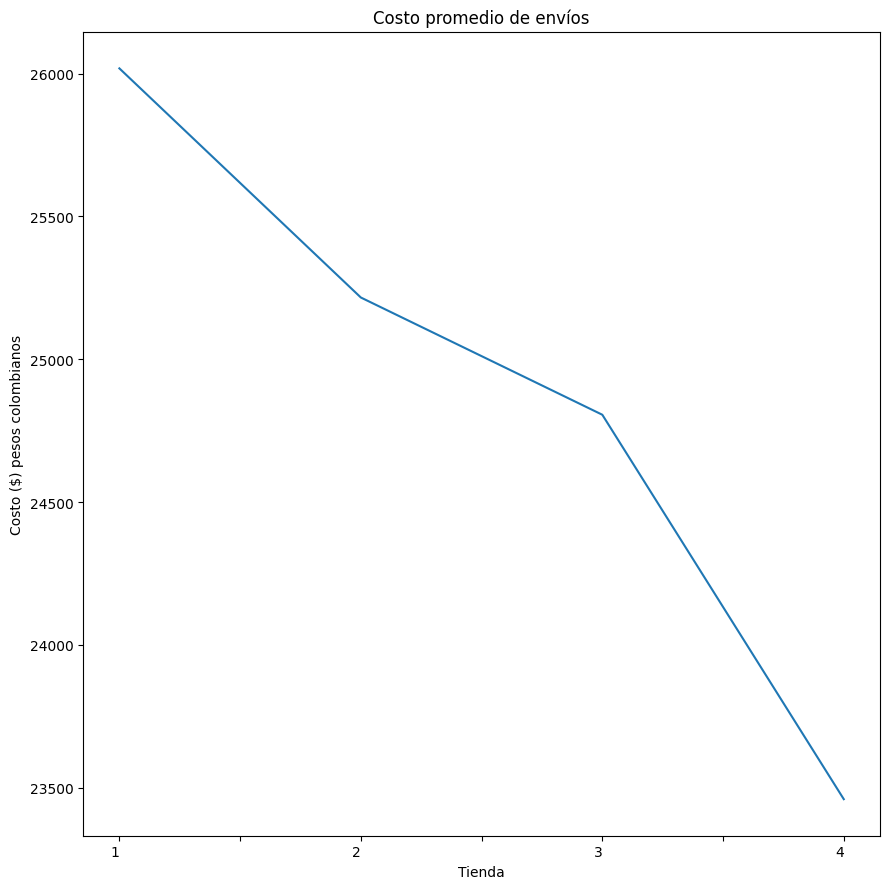

In [162]:
# Grafica lineal - Costos de envío

costo_envio = pd.Series({
    '1': costo_envio_prom_t1,
    '2': costo_envio_prom_t2,
    '3': costo_envio_prom_t3,
    '4': costo_envio_prom_t4
})

plt.figure(figsize=(9, 9))
costo_envio.plot(kind='line')
plt.title('Costo promedio de envíos')
plt.xlabel('Tienda')
plt.ylabel('Costo ($) pesos colombianos')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

In [197]:
costo_envio_total1 = sum(tienda['Costo de envío'])
print(f'El costo total del envío en la Tienda #1 es: $ {round(costo_envio_total1,2)} pesos colombianos')

El costo total del envío en la Tienda #1 es: $ 61377900.0 pesos colombianos


In [199]:
costo_envio_total2 = sum(tienda2['Costo de envío'])
print(f'El costo total del envío en la Tienda #2 es: $ {round(costo_envio_total2,2)} pesos colombianos')

El costo total del envío en la Tienda #2 es: $ 59485100.0 pesos colombianos


In [200]:
costo_envio_total3 = sum(tienda3['Costo de envío'])
print(f'El costo total del envío en la Tienda #3 es: $ {round(costo_envio_total3,2)} pesos colombianos')

El costo total del envío en la Tienda #3 es: $ 58516600.0 pesos colombianos


In [201]:
costo_envio_total4 = sum(tienda4['Costo de envío'])
print(f'El costo total del envío en la Tienda #4 es: $ {round(costo_envio_total4,2)} pesos colombianos')

El costo total del envío en la Tienda #4 es: $ 55317400.0 pesos colombianos


In [203]:
beneficios_1 = precio_total1 - costo_envio_total1
beneficios_2 = precio_total2 - costo_envio_total2
beneficios_3 = precio_total3 - costo_envio_total3
beneficios_4 = precio_total4 - costo_envio_total4

print(f'{beneficios_1}\n{beneficios_2}\n{beneficios_3}\n{beneficios_4}')

1089502500.0
1056858400.0
1039503000.0
983058300.0


In [ ]:
# Grafica lineal - Costos de envío totales

costo_envio = pd.Series({
    '1': costo_envio_prom_t1,
    '2': costo_envio_prom_t2,
    '3': costo_envio_prom_t3,
    '4': costo_envio_prom_t4
})

plt.figure(figsize=(9, 9))
costo_envio.plot(kind='line')
plt.title('Costo promedio de envíos')
plt.xlabel('Tienda')
plt.ylabel('Costo ($) pesos colombianos')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

#INFORME FINAL
##Introducción
El proposito del analisis es el de evaluar y recopilar información de cada una de las cuatro tiendas que posee el Sr. Juan para que le ayude a tomar la decisión de cual debe desprenderse.
##Metodología
Para realizar el analisis se considerarán las siguientes variables:
1. Ingresos totales por tienda
2. Productos vendidos por categoría
3. Costo del envío
4. Productos vendidos por tienda

Se realizarán graficos de barras (horizontales y verticales), lineales, diagramas de pastel, con la finalidad de servir de apoyo para elaborar el dictamen. Para cada uno de los campos analizados se colocará la tienda con el mejor desempeño.
##Resultados
1. Ingresos totales.
La Tienda #1 registró los ingresos más altos ($1,150,880,400.00), mientras que la Tienda #4 tuvo los más bajos ($1,038,375,700.00). La diferencia entre ambas fue de $112,504,700.

2. Productos vendidos por categoría.
"Cama King" fue la categoría con mejor desempeño, destacando especialmente en las Tiendas #3 y #4.

4. Productos vendidos por tienda
Las ventas de las cuatro tiendas fueron similares, pero la Tienda #4 vendió la menor cantidad de productos en términos de unidades.

5. Fortalezas

Tienda #1
Tuvo mayores ingresos y beneficios netos

Tienda #2
Destacó como la segunda mejor evaluada, en general, presentó un rendimiento equilibrado en los demás rubros.

Tienda #3
Fue la mejor evaluada por los usuarios, fue la segunda con el costo de envío más bajo, tuvo un desempeño adecuado en los otros análisis.

Tienda #4
Tuvo el costo de envío más bajo

6. Áreas de oportunidad

Tienda #1
Tuvo el costo de envío más alto, por una diferencia mínima con respecto a la Tienda #4, resultó ser la peor evaluada por los clientes.

Tienda #2
No se detectaron sesgos importantes

Tienda #3
No se detectaron sesgos importantes

Tienda #4
Presentó los ingresos y beneficios nestos más bajos

##Conclusiones
Con base en los análisis realizados, se recomienda la venta de la Tienda #4 debido a su consistente bajo desempeño en variables clave. Presentó los ingresos y beneficios netos más bajos, y aunque tuvo el costo de envío más bajo, esta ventaja no fue suficiente para compensar la escasa venta de productos y el bajo nivel de ingresos. El análisis de beneficio-costo elaborado confirmó esta decisión, identificando a la Tienda #4 como la de peor desempeño entre las cuatro.